# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

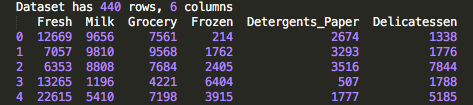

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # or: from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns #Seaborn is a Python visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive statistical graphics.

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer: **

PCA: PCA finds vectors that explains the variance of the data. Variance is always non-negative: a small variance indicates that the data points tend to be very close to the mean (expected value) and hence to each other, while a high variance indicates that the data points are very spread out around the mean and from each other. [Variance definition](https://en.wikipedia.org/wiki/Variance). In this case we can expect the first PCA dimension to be products that differ from the rest in quantity, that require daily delivery like Fresh Food, Milk and Grocery.

ICA: ICA finds basis vectors that are statistically independent of the projected data. We can expect to receive a matrix containing all the features (six).

###PCA

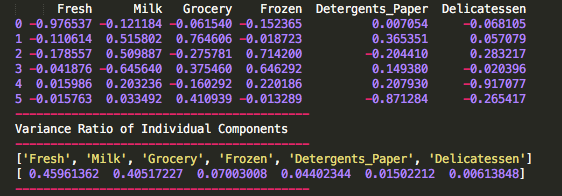

In [14]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
#PCA finds vectors that explains the variance of the data
pca = PCA(n_components = 6).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
# Components of the data
print pd.DataFrame(pca.components_, columns = list(data.columns))
# Variance of the data
print "------------------------------------------"
print "Variance Ratio of Individual Components"
print "------------------------------------------"
print list(data.columns) #Columns names
print pca.explained_variance_ratio_

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer: **

PCA emphasises on gaining more information and minimizing loss of the same. As seen from the PCA graph most of the variance in the dataset is explained by the first two principal components. After two dimensions the graph begins to flatten. To explain the variability of the dataset it would be more appropriate to use 2 dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer: **

PCA provides dimensionality reduction for visualisation of data and makes it possible to identify latent features and make proper use of the data without increasing computational cost. The dimensions represent eigen vectors. 

Making use of the information from the previous graph we observe that the first two principal components and recalling that PCA first converges to the center of the dataset and projects its axes along the spread of the data, the first two principal components explain about 85% of the variability in the dataset. 

Using these two features in the training of the PCA algorithm we can have a maximum coverage of the dataset's variability without losing a lot of information.

###ICA

In [39]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
centered_data = data.copy() - data.mean() #centering data at the origin
#using ICA
ica = FastICA(n_components = 6).fit(centered_data)

# Print the independent components
print ica.components_

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer: **

ICA: Independent Component Analysis attempts to decompose a multivariate signal into independent non-gaussian signals. It is primarily used in signal processing.

It gives us a basis by which we can separate indepenedent features. This is essential for making use of the clustering method; this helps us to have more visible boundaries to separate the customer segment.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Answer: **

The k-means method is used to divide the observations into homogeneous clusters, based on their description by a set of quantitative variables.

Advantages of K-means clustering:

1. Fast, robust and easier to understand.

2. Relatively efficient: O(tknd), where n is # objects, k is # clusters, d is # dimension of each object, and t  is # iterations. Normally, k, t, d << n.

3. Gives best result when data set are distinct or well separated from each other.

4. By multiplying the starting points and the repetitions, several solutions may be explored.

 [KmeansClustering-Source1](https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm)

 [KmeansClustering-Source2](https://www.xlstat.com/en/solutions/features/k-means-clustering)


Advantages of Gaussian Mixture Models::

1. Fastest algorithm for learning mixture model 

2. Gives extremely useful result for the real world data set.

3. As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

4. The GMM algorithm is a good algorithm to use for the classification of static postures and non-temporal pattern recognition.

 [GMMClustering-Source1](https://sites.google.com/site/dataclusteringalgorithms/gaussian-clustering-algorithm)

 [GMMClustering-Source2](http://www.nickgillian.com/wiki/pmwiki.php/GRT/GMMClassifier)

 [GMMClustering-Source3](http://scikit-learn.org/stable/modules/mixture.html)

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [11]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [135]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components = 2).fit_transform(centered_data)
print pd.DataFrame(reduced_data[:10], columns = ["1st-dimension (x)", "2nd-dimension (y)"])
#print len(reduced_data) # it's equivalent to the number of samples in the .csv file, 440

In [139]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

#Adjust 3 or 4 or k clusters
clustersKMeans = KMeans(n_clusters = 3).fit(reduced_data)
#Adjust 2 or 3 or 4  or k clusters
clustersGMM = GMM(n_components = 2).fit(reduced_data)
print "Here is the clustersKMeans (code): " + str(clustersKMeans)
print "---------"
print "Here is the clustersGMM (code): " + str(clustersGMM)

In [149]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_KMeans = clustersKMeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z_GMM = clustersGMM.predict(np.c_[xx.ravel(), yy.ravel()])

In [161]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroidsKMeans = clustersKMeans.cluster_centers_
centroidsGMM = clustersGMM.means_
print "centroids of clustersKMeans: "
print pd.DataFrame(centroidsKMeans, columns = ["x-axis", "y-axis"])
print "---------------"
print "cluster means of clustersGMM: "
print pd.DataFrame(centroidsGMM, columns = ["x-axis", "y-axis"])

In [65]:
# Put the result into a color plot

#Z_KMeans model plot
Z_KMeans = Z_KMeans.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z_KMeans, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


#Z_GMM model plot
Z_GMM = Z_GMM.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z_GMM, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer: **

We can observe mainly two clusters. One cluster is formed by the group of close points at the bottom right of the graph. The other cluster is formed by all the points that are not within the first cluster. Given that the wholesale store distributes primarily to two different kind of customers, large volume customer and small family run shops, we can interpret these two clusters as the two type of wholesale customers. Since, there was a large number complains received from small family run shops (after the wholesale store began delivering food products every evening), we can clearly see that the bottom right cluster represents the small family run shops wheareas the rest of the points (mostly located in the middle or at the top) represents the large volume customers.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer: **

PCA along with GMM gave most insight into the data. PCA helped to develop latent features and also reduced dimensions for better visualization of data. In this case it reduced the feature space to 2 to better visualize the data (two clusters). Then, GMM provided better results from K-means by incorporating EM (expectation-maximization algorithm) for fitting of Gaussian-Mixture Models (GMM). This is truly useful when there is no clear division of data. Grouping the data into clusters implementing GMM enables us to separate the customers into their respective market segments facilitating business decision making.

**9)** How would you use that technique to help the company design new experiments?

**Answer: **

Since we now have different segments, we can perform the A/B test and we can define our control and experiment group within the market segments without affecting the other segment by calculating the p-value for the resulting tests. If we were to find that we have a p-value greater than what we consider significant, we can go ahead and implement the marketing initiative of changing the delivery schedule to evening time having the certainty that the delivery experiment will have a positive impact.

**10)** How would you use that data to help you predict future customer needs?

**Answer: **

a) Feeding this model to a supervised model we can predict the segment where a new customer locates according to the volume of products that he buys. We can expect that the future data will fit in the clusters from our model. Recomputing will be necessary if most of the new points in our model are outliers.

b) Now that we have defined better the customer segments, we can run different tests to predict the changes in profit after particular changes. For example: changes in product volume and modifying the delivery schedule of products. Having organized all the customers in segments we can find better strategies or make effective changes to provide better services for the clients that could offer higher profits to the store.

c) Using market basket techniques we can supply products that go along with the current customer needs avoiding the entrance of products that are not demanded (loss of money).